# Data Science and Business Analytics Intern @ The Sparks Foundation

# Task 3 : Exploratory Data Analysis - Retail


# Vivek B S

<br>

## Problem Statement

* <b>Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’. </b>

*  <b>As a business manager, try to find out the weak areas where you can
work to make more profit. </b>


In [45]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
# Importing dataset
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [47]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [48]:
# shape
df.shape

(9994, 13)

In [49]:
# description
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [51]:
# Check if there is any missing values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [52]:
print('Total no. of null values = ', df.isnull().sum().sum())

Total no. of null values =  0


In [53]:
# check data type in dataset
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [54]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [55]:
# Checking the dataset for any duplicate value. If any duplicate value is present we will drop it
df.duplicated().sum()

17

In [56]:
# Dropping duplicate values
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [57]:
# new shape
df.shape

(9994, 13)

### Feature Selection
* Removing unnecessary variable

In [58]:
# Deleting column Postal Code
df.drop(columns="Postal Code", axis=1, inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


## Data Visualization

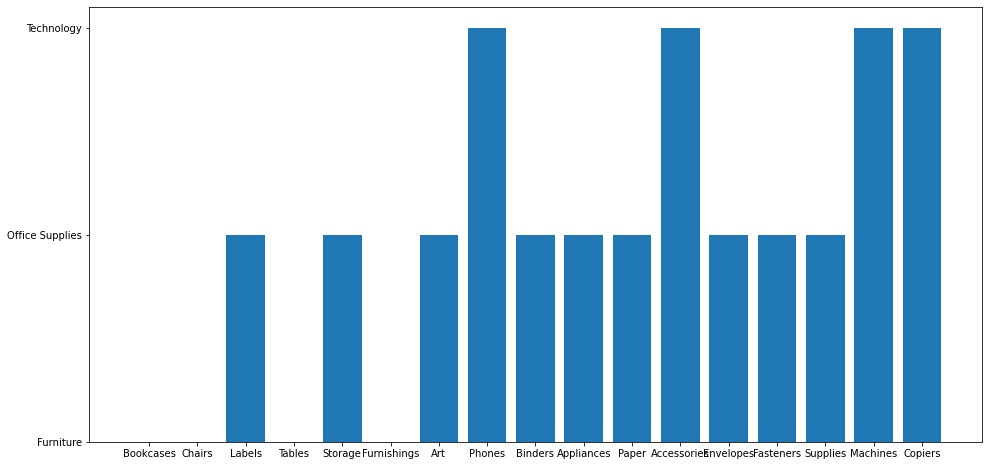

In [60]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=df)
plt.show()

In [61]:
print(df['State'].value_counts())

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

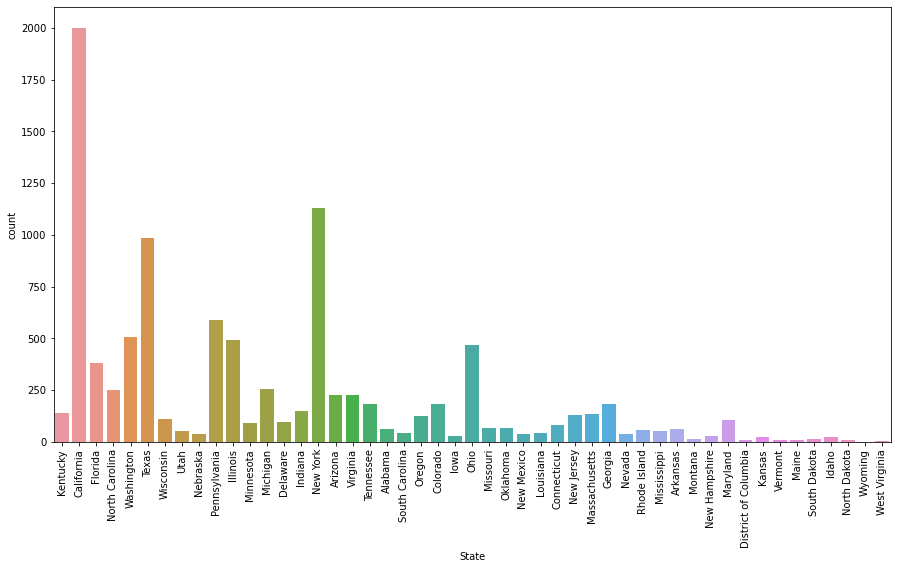

In [62]:
import seaborn as sns

plt.figure(figsize = (15,8))
sns.countplot(x = df['State'])
plt.xticks(rotation = 90)
plt.show()

In [63]:
print(df['Sub-Category'].value_counts())

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


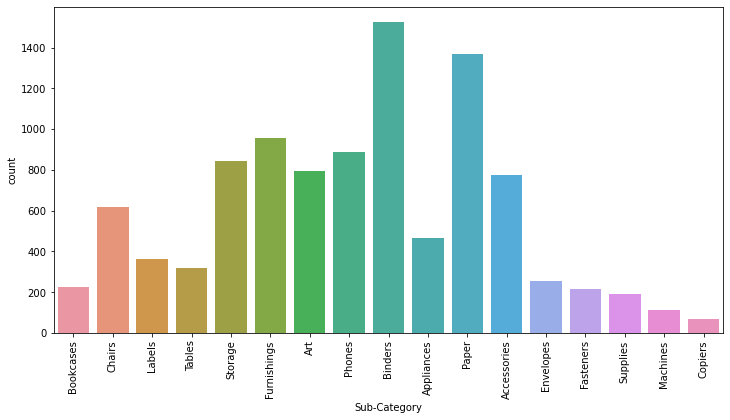

In [64]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

In [65]:
 # Correlation of dataset
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


In [66]:
# Covariance of dataset
df.cov()

,Sales,Quantity,Discount,Profit
Sales,388434.455308,278.459923,-3.627228,69944.096586
Quantity,278.459923,4.951113,0.003961,34.534769
Discount,-3.627228,0.003961,0.042622,-10.615173
Profit,69944.096586,34.534769,-10.615173,54877.798055


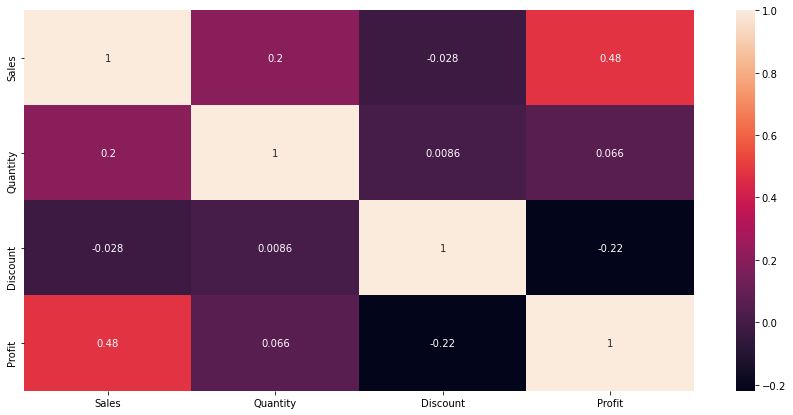

In [67]:
# Heatmap to check the collinearity between sales, quantity, discount and profit
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot= True)
plt.show()

<AxesSubplot:xlabel='Segment', ylabel='count'>

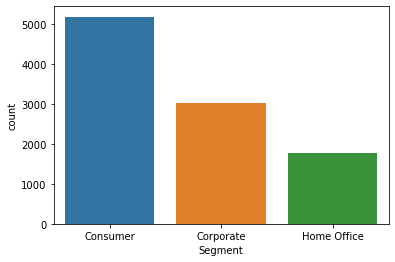

In [68]:
sns.countplot(x=df['Segment'])

<AxesSubplot:xlabel='Region', ylabel='count'>

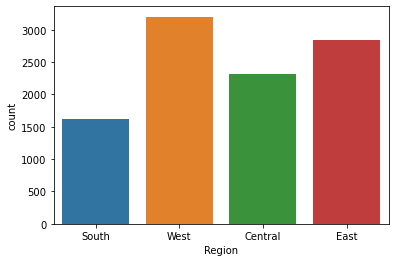

In [69]:
sns.countplot(x=df['Region'])

<AxesSubplot:xlabel='Category', ylabel='count'>

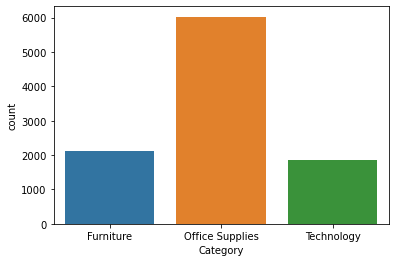

In [26]:
sns.countplot(x=df['Category'], data=df)

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

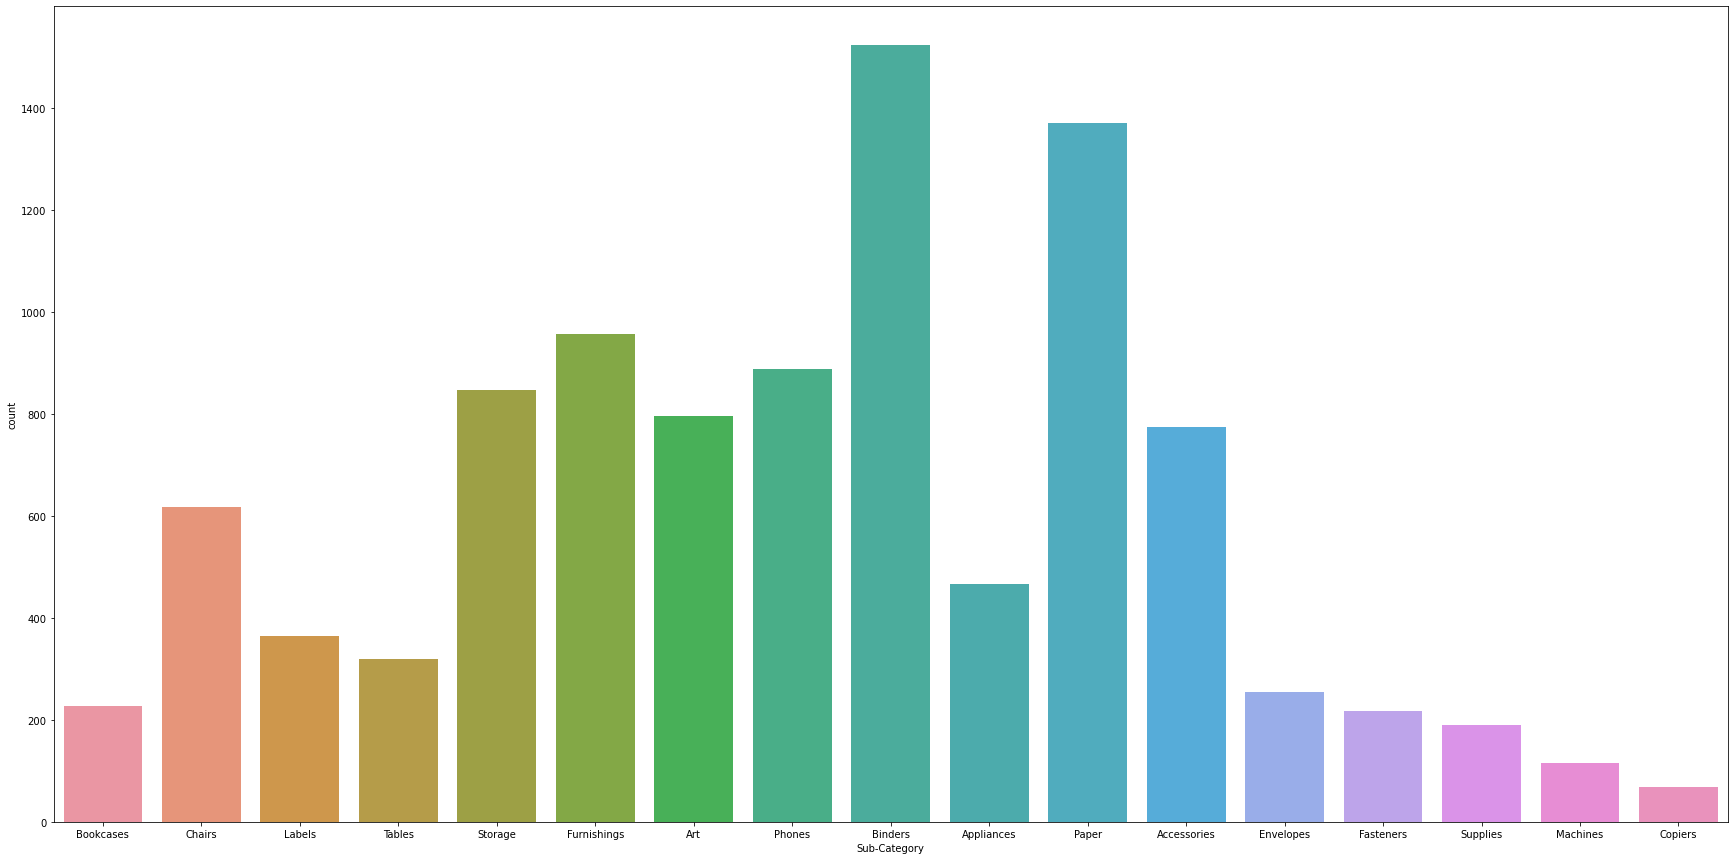

In [70]:
plt.figure(figsize=(30,15))
sns.countplot(x=df['Sub-Category'], data=df)

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

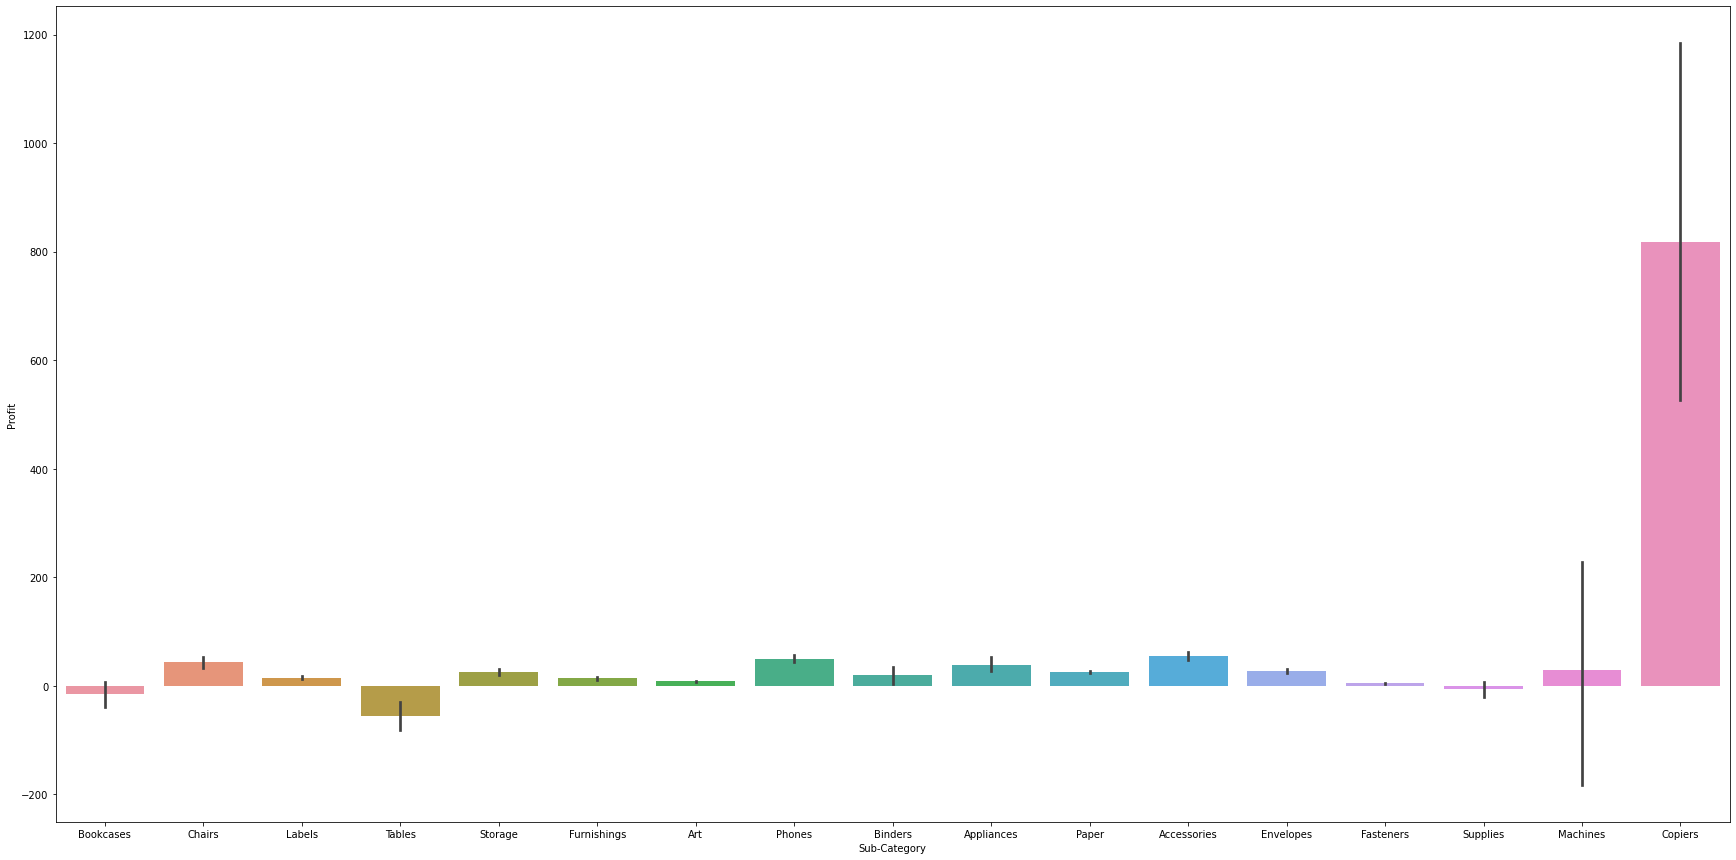

In [71]:
plt.figure(figsize=(30,15))
sns.barplot(x=df['Sub-Category'], y=df['Profit'])

C:\Users\Vivek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


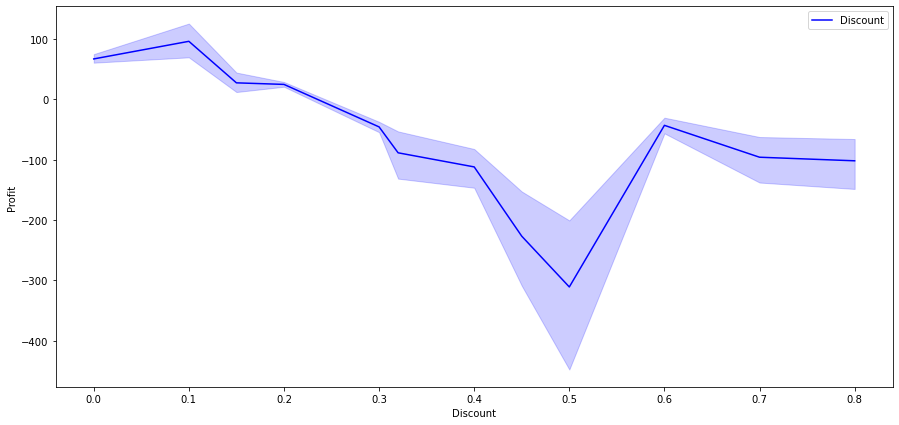

In [72]:
plt.figure(figsize = (15,7))
sns.lineplot('Discount', 'Profit', data = df, color = 'b', label= 'Discount')
plt.legend()

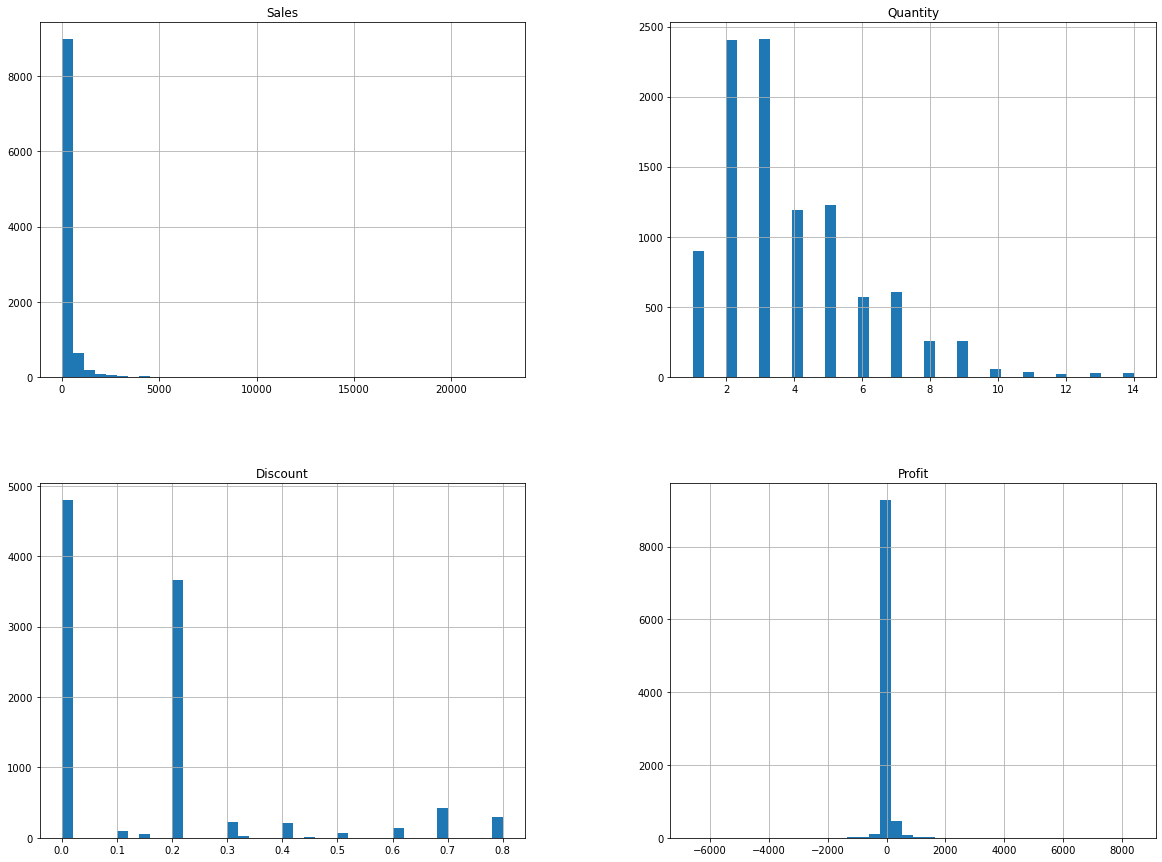

In [73]:
df.hist(bins=40 ,figsize=(20,15))
plt.show()

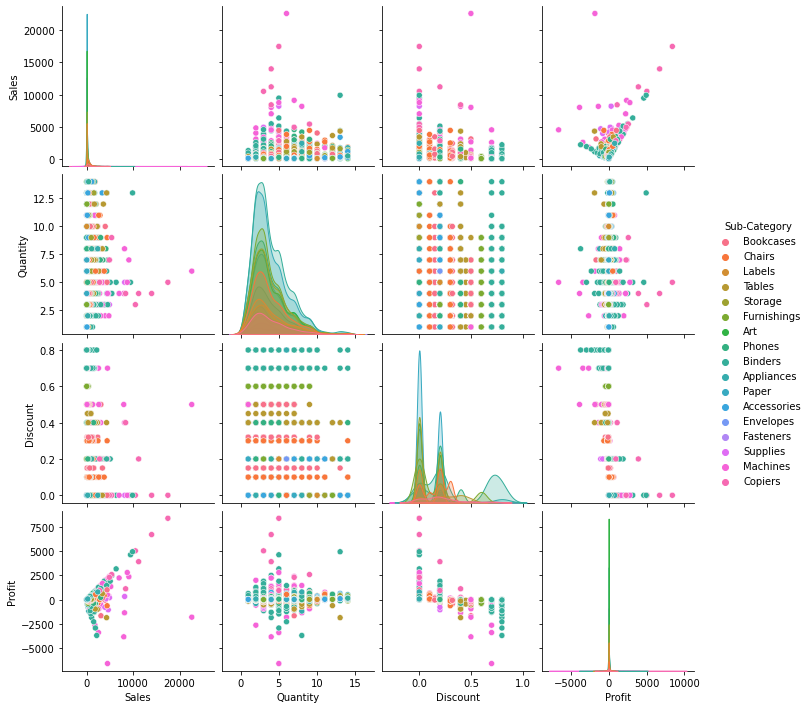

In [74]:
figsize=(20,10)
sns.pairplot(df,hue='Sub-Category')

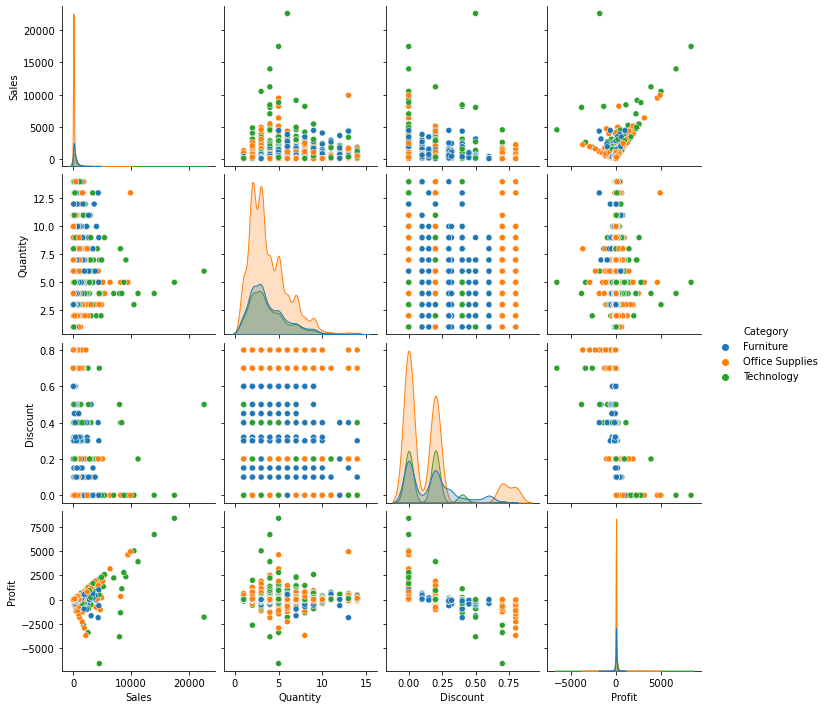

In [75]:
figsize=(20,10)
sns.pairplot(df,hue='Category')

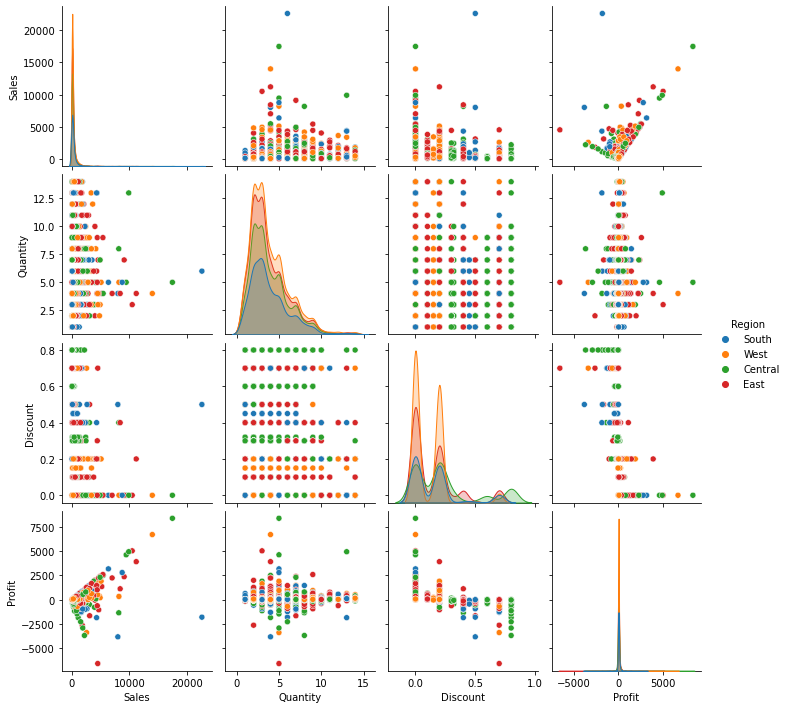

In [76]:
figsize=(20,10)
sns.pairplot(df, hue="Region")

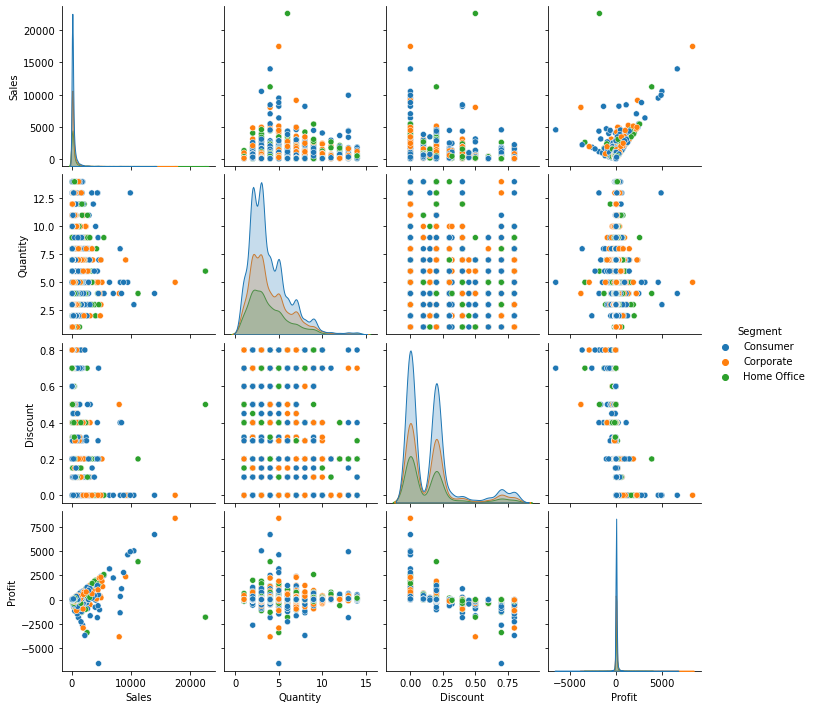

In [78]:
figsize=(20,10)
sns.pairplot(df,hue='Segment')

In [79]:
# sum the sales, profit, discount, quantity according to every state of region and also according to sub-categories sales
grouped=pd.DataFrame(df.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])['Quantity','Discount','Sales','Profit'].sum().reset_index())
grouped

<ipython-input-79-15818f8908b8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped=pd.DataFrame(df.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])['Quantity','Discount','Sales','Profit'].sum().reset_index())


,Ship Mode,Segment,Category,Sub-Category,State,Region,Quantity,Discount,Sales,Profit
0,First Class,Consumer,Furniture,Bookcases,Arizona,West,5,0.70,181.470,-320.5970
1,First Class,Consumer,Furniture,Bookcases,California,West,9,0.45,1809.497,243.2526
2,First Class,Consumer,Furniture,Bookcases,Colorado,West,3,0.70,89.991,-152.9847
3,First Class,Consumer,Furniture,Bookcases,Florida,South,3,0.20,314.352,-15.7176
4,First Class,Consumer,Furniture,Bookcases,Georgia,South,5,0.00,354.900,88.7250
...,...,...,...,...,...,...,...,...,...,...
2978,Standard Class,Home Office,Technology,Phones,Texas,Central,12,0.60,808.704,77.9712
2979,Standard Class,Home Office,Technology,Phones,Vermont,East,5,0.00,1294.750,336.6350
2980,Standard Class,Home Office,Technology,Phones,Virginia,South,17,0.00,365.130,58.7384
2981,Standard Class,Home Office,Technology,Phones,Washington,West,17,1.20,1989.448,63.2645


In [80]:
# sum, mean, min, max, count median, standard deviation, variance of each states of Profit
df.groupby("State").Profit.agg(["sum","mean","min","max","count","median","std","var"])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76381.3871,38.171608,-325.5720,1906.4850,2001,13.30560,97.691593,9543.647400
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


In [81]:
sales_profit = df.groupby("State")["Profit"].sum()
sales_profit

State
Alabama                  5786.8253
Arizona                 -3427.9246
Arkansas                 4008.6871
California              76381.3871
Colorado                -6527.8579
Connecticut              3511.4918
Delaware                 9977.3748
District of Columbia     1059.5893
Florida                 -3399.3017
Georgia                 16250.0433
Idaho                     826.7231
Illinois               -12607.8870
Indiana                 18382.9363
Iowa                     1183.8119
Kansas                    836.4435
Kentucky                11199.6966
Louisiana                2196.1023
Maine                     454.4862
Maryland                 7031.1788
Massachusetts            6785.5016
Michigan                24463.1876
Minnesota               10823.1874
Mississippi              3172.9762
Missouri                 6436.2105
Montana                  1833.3285
Nebraska                 2037.0942
Nevada                   3316.7659
New Hampshire            1706.5028
New Jersey    

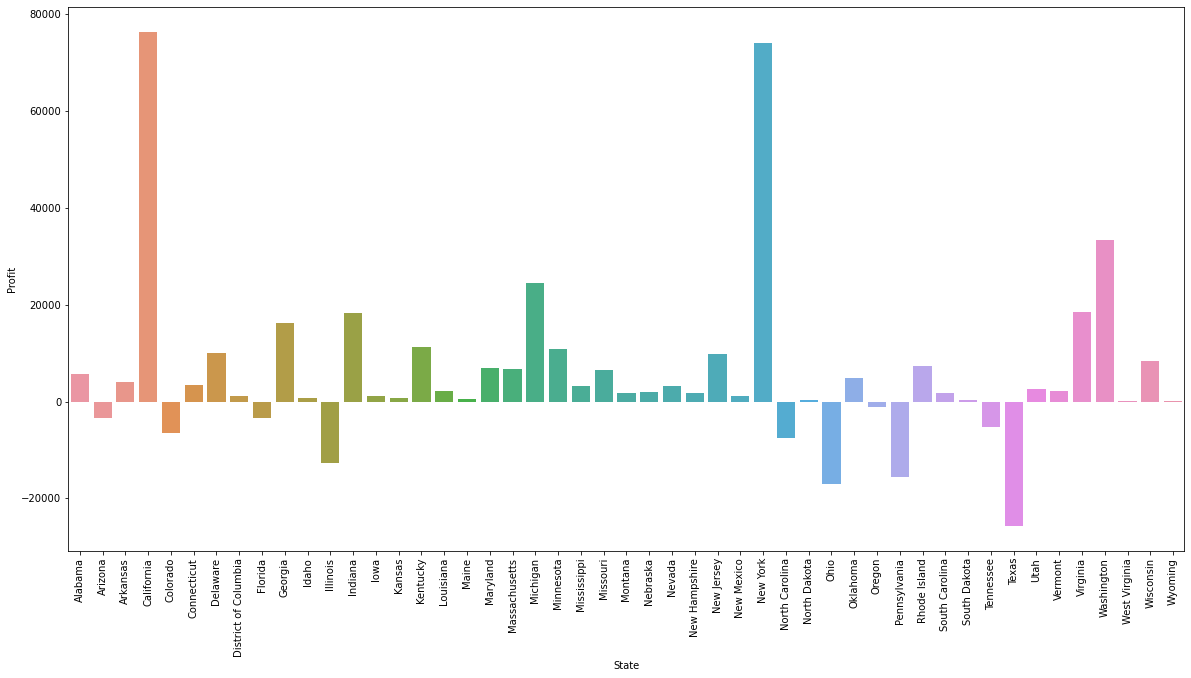

In [82]:
# State wise Profit
plt.figure(figsize=(20,10))
sns.barplot(x=sales_profit.index, y=sales_profit.values)
plt.ylabel("Profit")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='State'>

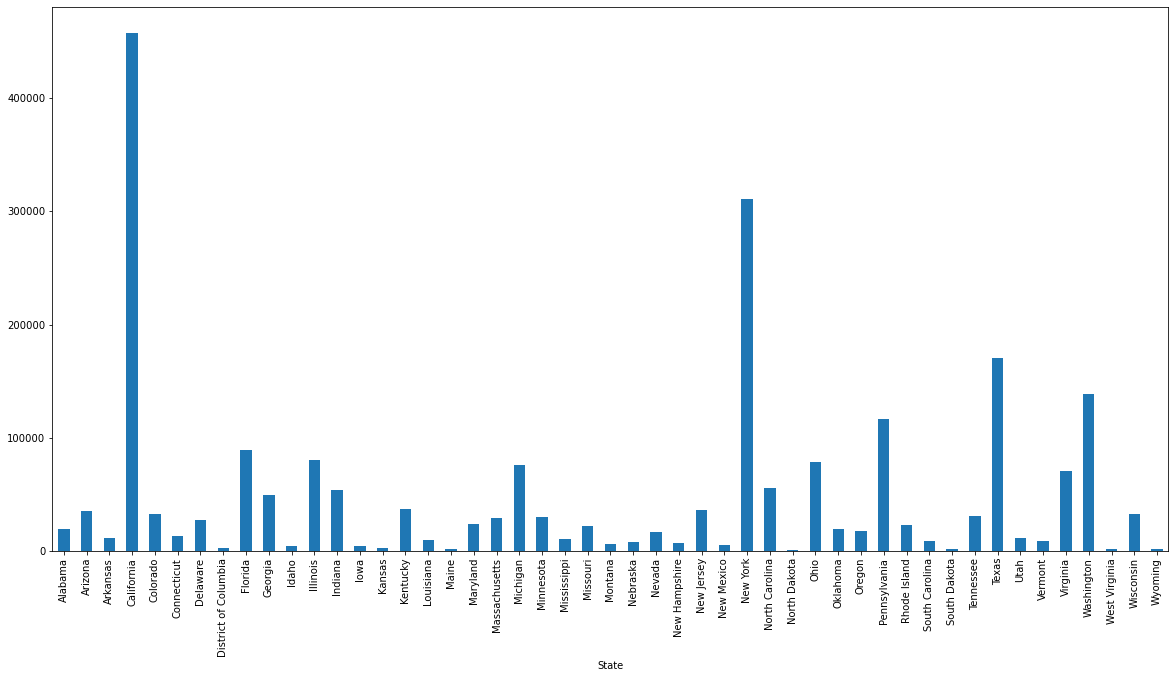

In [83]:
# State wise Sales
sales = df.groupby("State")["Sales"].sum()
sales.plot.bar(figsize=(20,10))

<ipython-input-84-d72e9a294d5d>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  category = df.groupby("Category")["Profit", "Sales"].sum()


<AxesSubplot:xlabel='Category'>

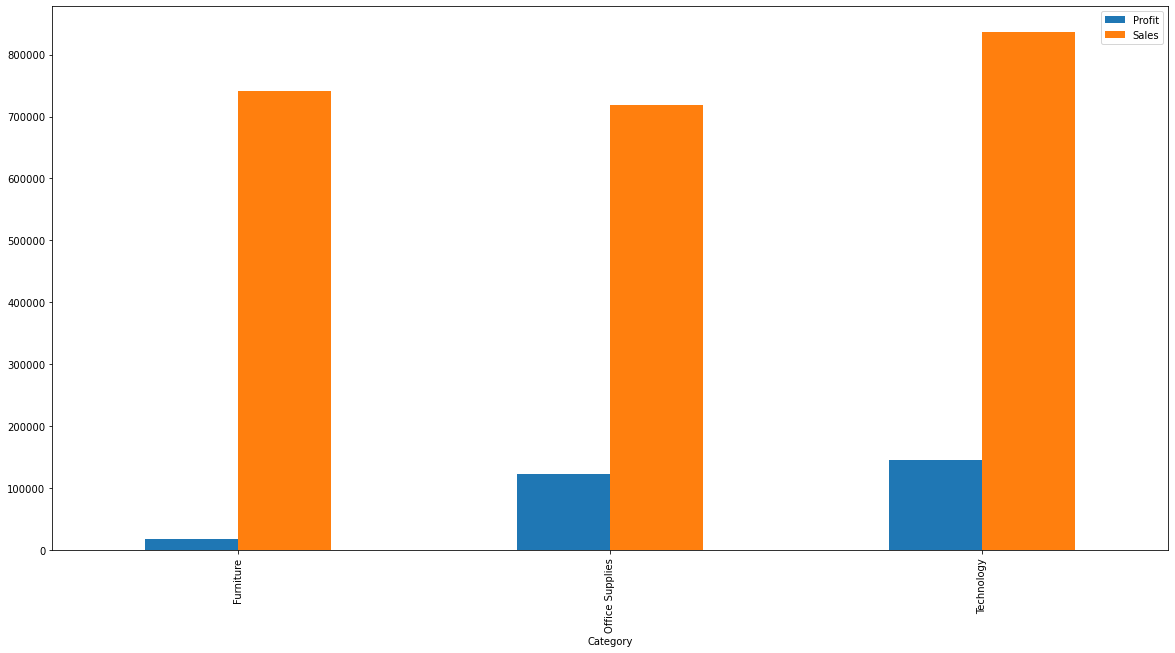

In [84]:
# Sales and Profit Category wise

category = df.groupby("Category")["Profit", "Sales"].sum()
category.plot.bar(figsize=(20,10))

<ipython-input-85-e8947f741b62>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  category = df.groupby("Sub-Category")["Profit", "Sales"].sum()


<AxesSubplot:xlabel='Sub-Category'>

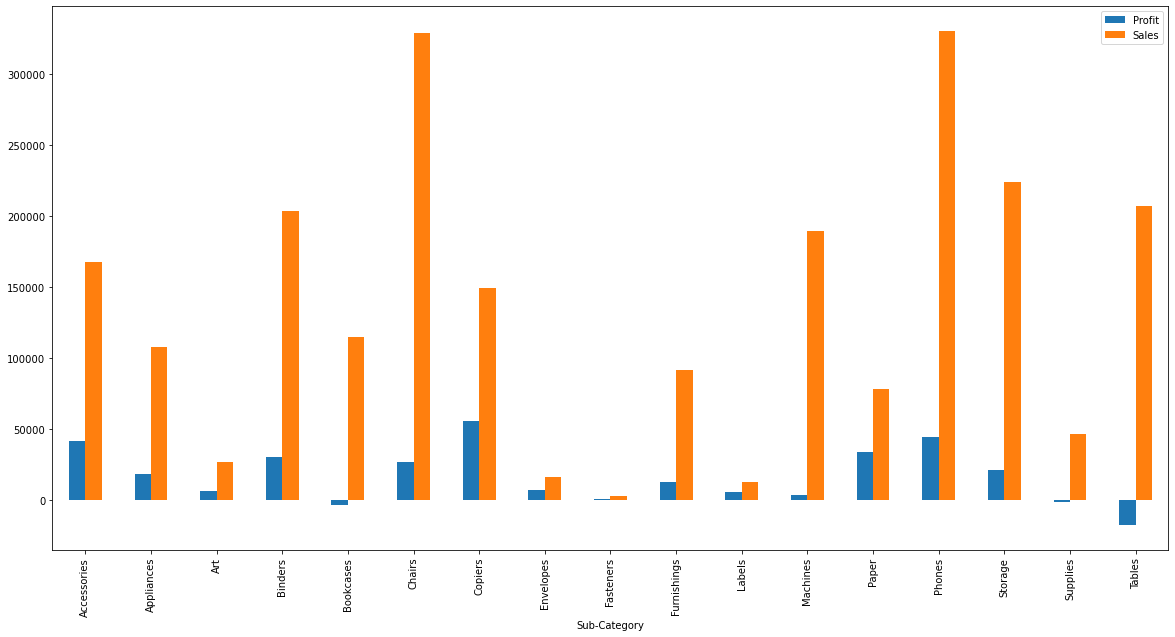

In [85]:
# Sales and Profit Sub-Category wise

category = df.groupby("Sub-Category")["Profit", "Sales"].sum()
category.plot.bar(figsize=(20,10))

<ipython-input-86-72ade8efaa34>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  category = df.groupby("State")["Profit", "Sales"].sum()


<AxesSubplot:xlabel='State'>

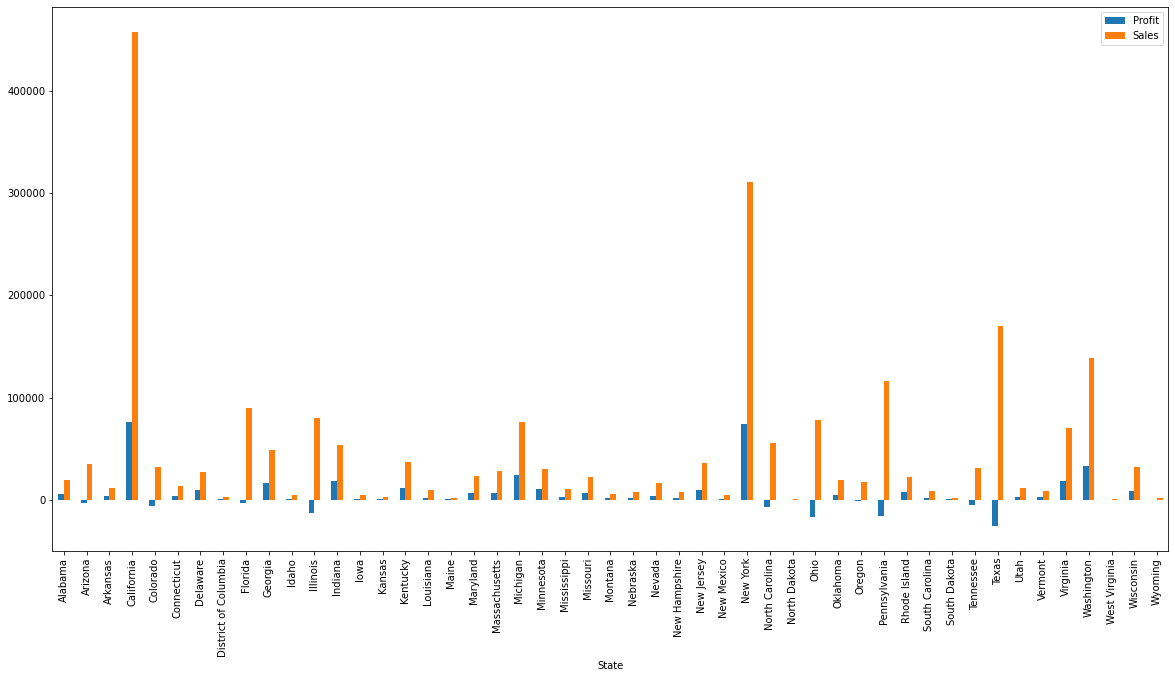

In [86]:
# Sales and Profit Sub-Category wise

category = df.groupby("State")["Profit", "Sales"].sum()
category.plot.bar(figsize=(20,10))

[]

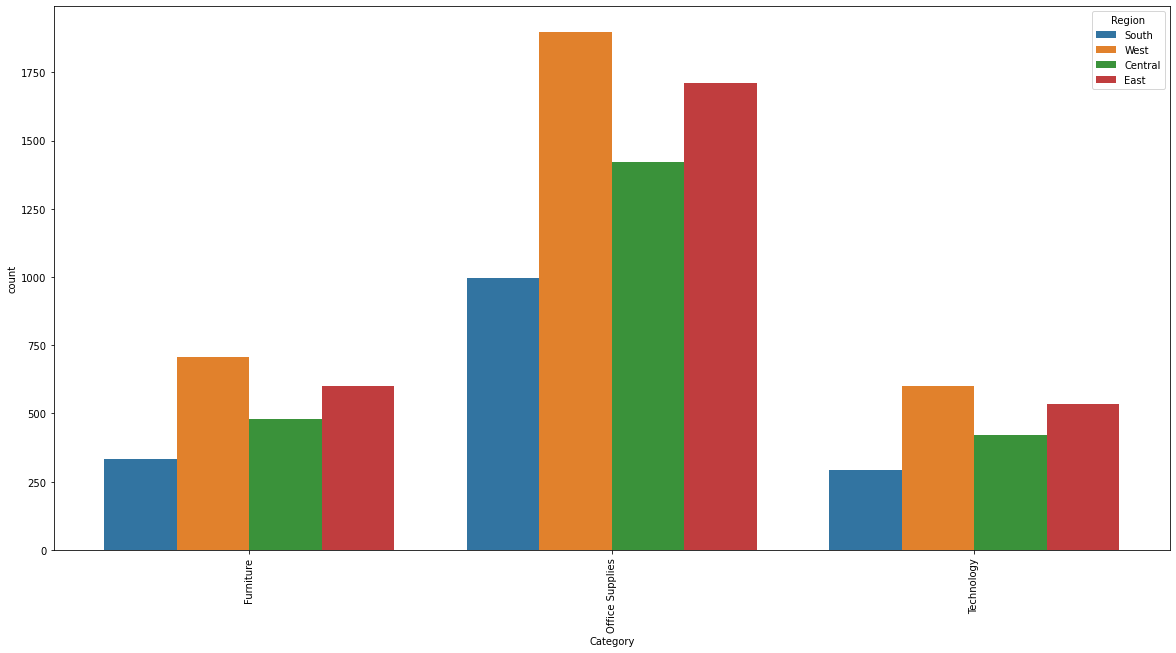

In [87]:
# Category vs Region

plt.figure(figsize=(20,10))
sns.countplot(x="Category", hue= "Region", data=df)
plt.xticks(rotation="vertical")
plt.plot()

[]

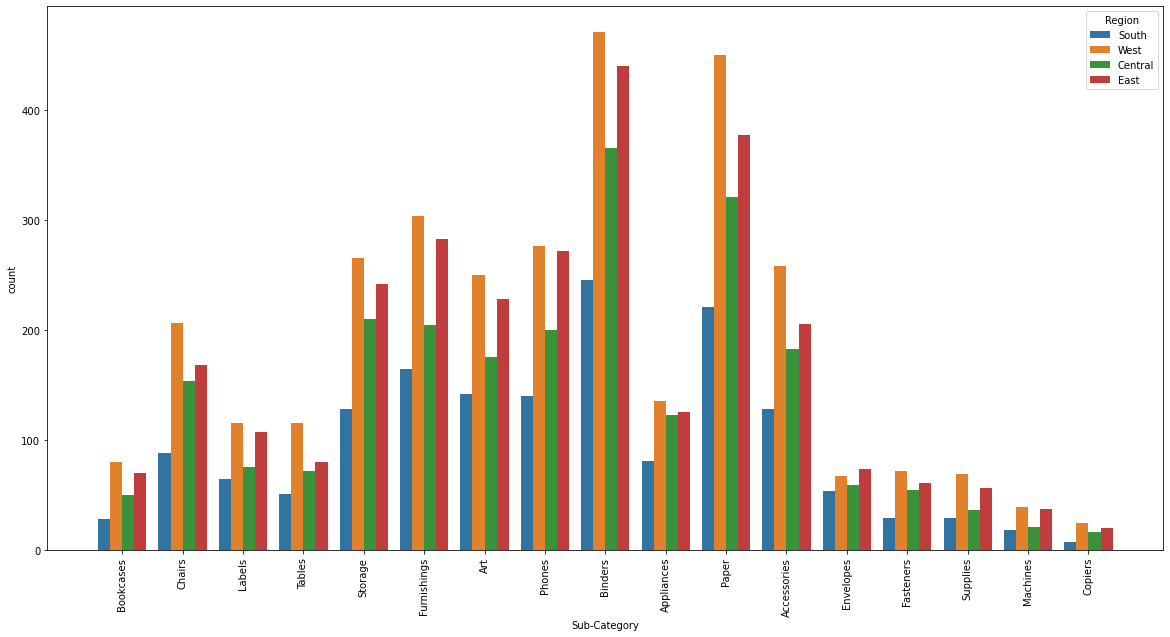

In [88]:
# Sub-Category vs. Region

plt.figure(figsize=(20,10))
sns.countplot(x="Sub-Category", hue= "Region", data=df)
plt.xticks(rotation="vertical")
plt.plot()

## Conclusion : 

1. Profits and sales are highly correlated.

2. There is no correlation between quantity and profit.

3. In category, Furniture has large no. of sales but instead of making profit, it makes loss. So, there is need to limit the sales of Furniture.

4. In sub-category, Tables has has large no. of sales but instead of making profit, it makes loss. So, there is need to limit the sales of Tables.

5. States like Texas, Ohio has huge sales but it makes big loss. So, there is need to reduce the sales in these states.

6. States like Michigan, Indiana, Virginia, Georgia makes good profit. So, sales can be increased in these states.